# **IMO 1 EXAM 2**

Ana Milena Forero Pinto

In [ ]:
from google.colab import files
from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


$$p → \frac{p}{1+g D}$$

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import colors
from numpy import array, average
from matplotlib.pyplot import cm

In [ ]:
def division_decision(p): #Like a coin tossing
  u = np.random.rand()
  if u < 1-p:
    return 2 #2 differentiated cells
  else:
    return 1 #2 stem cells

## **Question 4**

In [ ]:
trayectories = []
trayectories_no_control = []

Trayectory 1


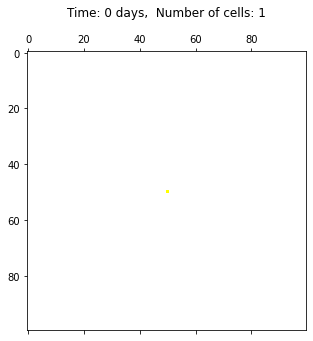


 -------------------------------------------- 



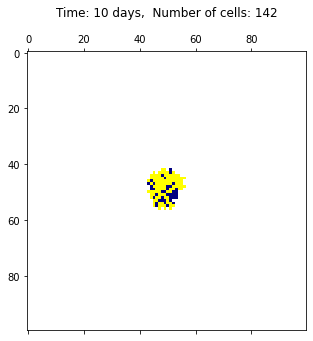


 -------------------------------------------- 



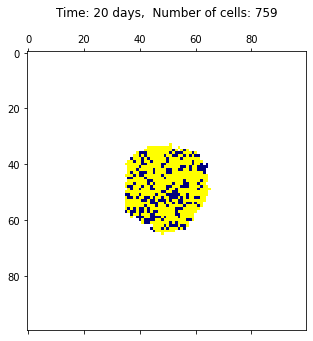


 -------------------------------------------- 



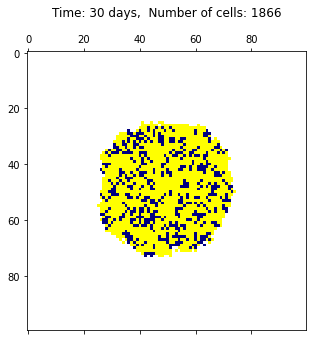


 -------------------------------------------- 

Trayectory 2


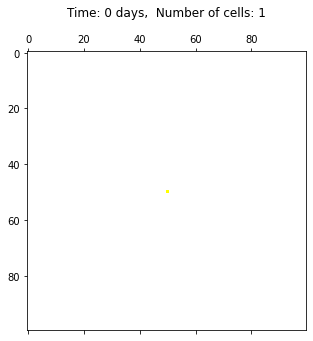


 -------------------------------------------- 



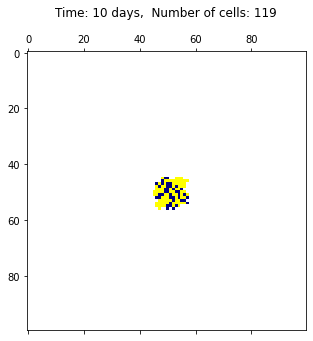


 -------------------------------------------- 



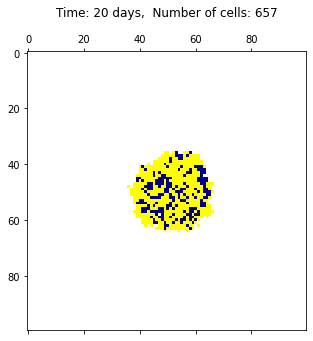


 -------------------------------------------- 



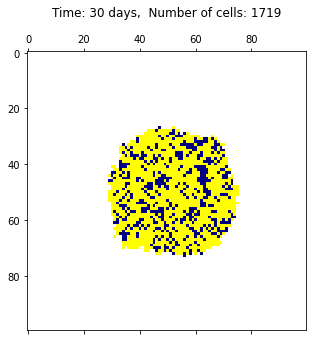


 -------------------------------------------- 

Trayectory 3


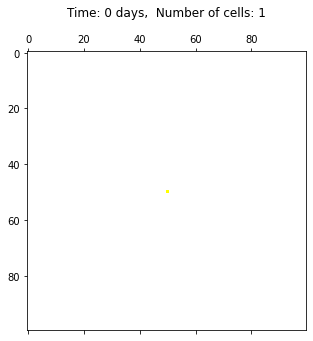


 -------------------------------------------- 



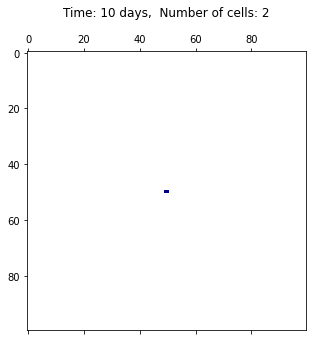


 -------------------------------------------- 



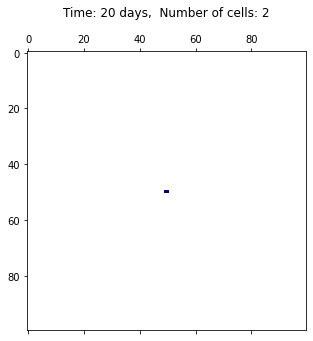


 -------------------------------------------- 



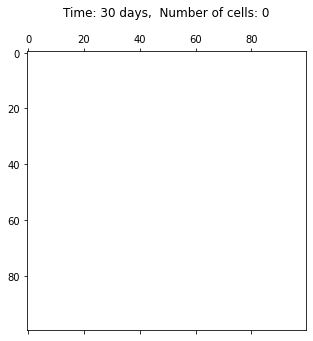


 -------------------------------------------- 

Trayectory 4


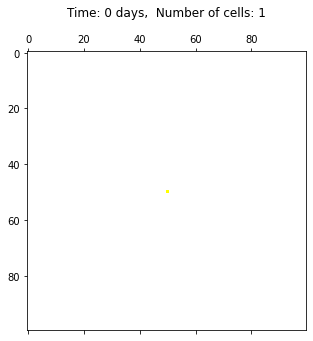


 -------------------------------------------- 



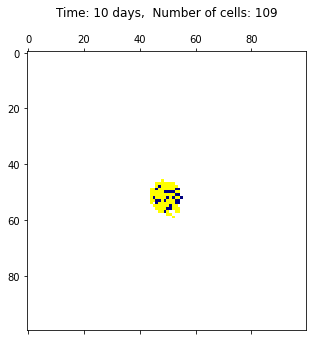


 -------------------------------------------- 



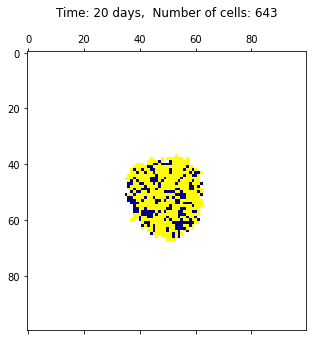


 -------------------------------------------- 



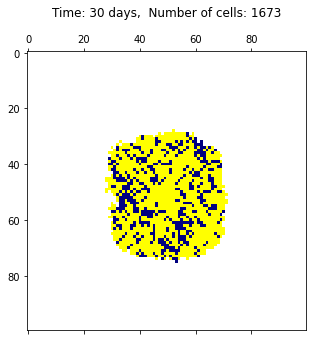


 -------------------------------------------- 

Trayectory 5


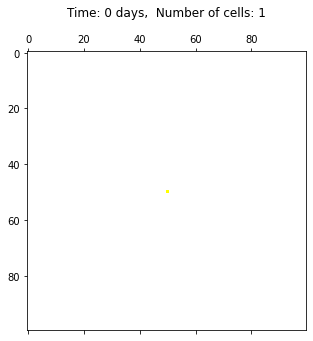


 -------------------------------------------- 



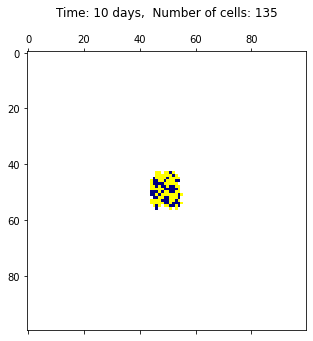


 -------------------------------------------- 



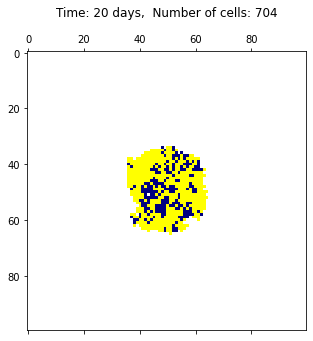


 -------------------------------------------- 



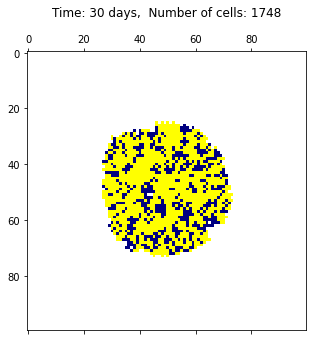


 -------------------------------------------- 

Trayectory 6


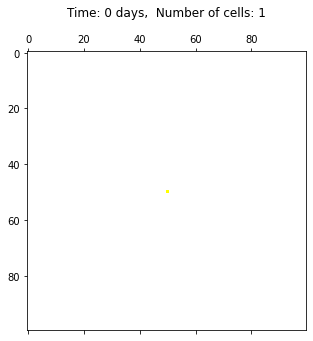


 -------------------------------------------- 



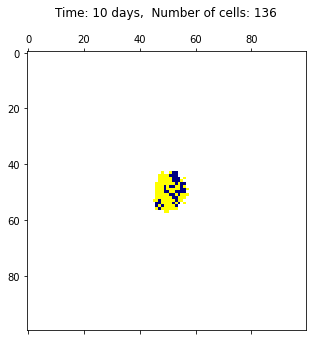


 -------------------------------------------- 



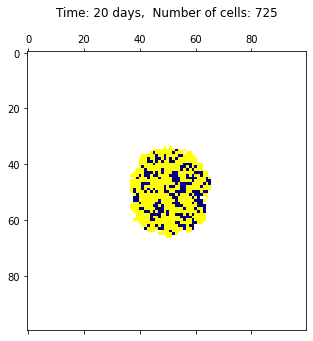


 -------------------------------------------- 



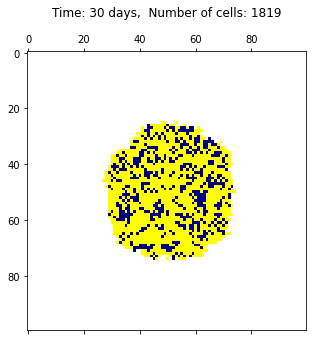


 -------------------------------------------- 

Trayectory 7


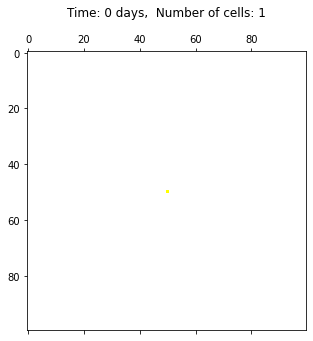


 -------------------------------------------- 



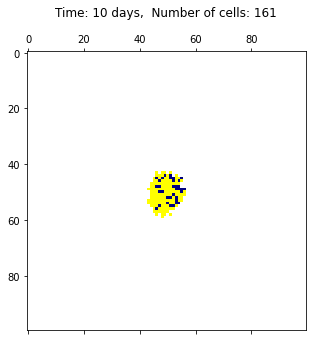


 -------------------------------------------- 



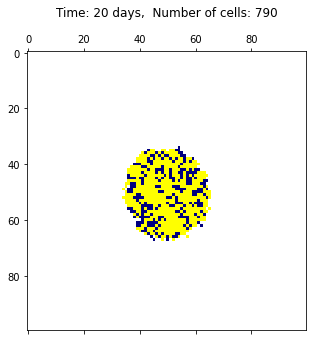


 -------------------------------------------- 



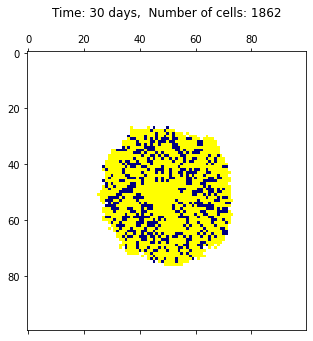


 -------------------------------------------- 

Trayectory 8


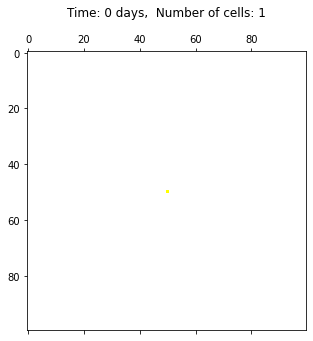


 -------------------------------------------- 



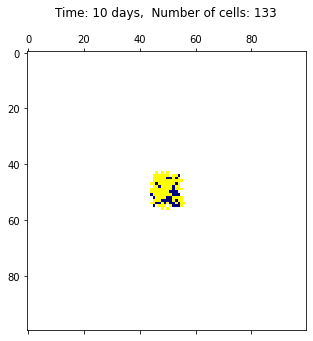


 -------------------------------------------- 



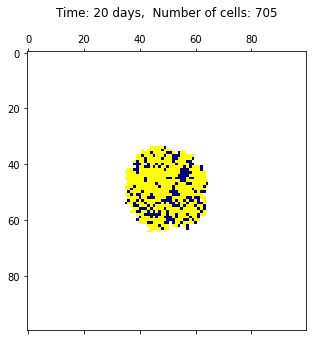


 -------------------------------------------- 



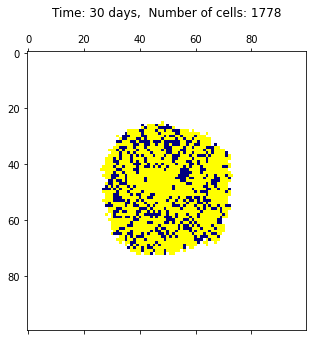


 -------------------------------------------- 

Trayectory 9


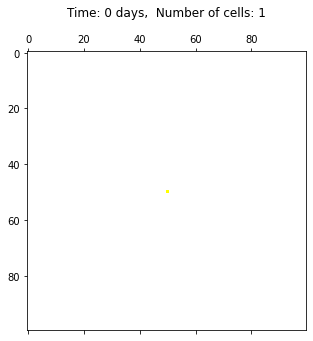


 -------------------------------------------- 



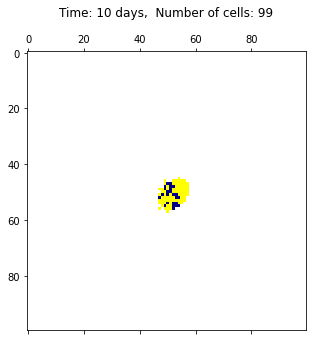


 -------------------------------------------- 



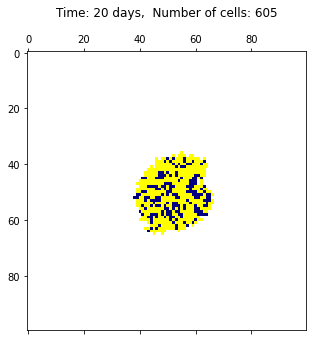


 -------------------------------------------- 



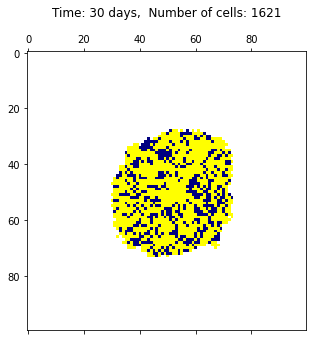


 -------------------------------------------- 

Trayectory 10


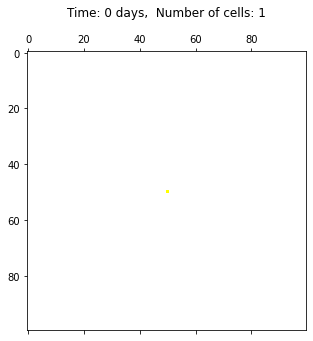


 -------------------------------------------- 



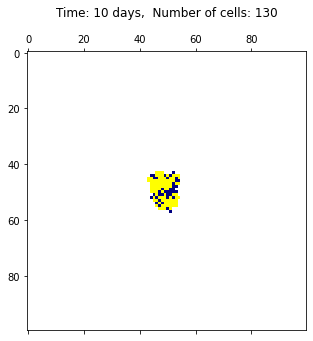


 -------------------------------------------- 



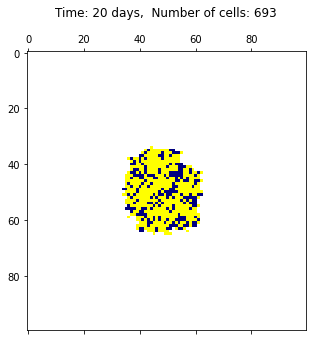


 -------------------------------------------- 



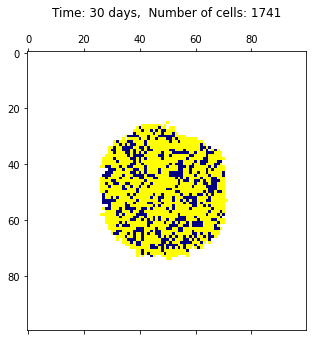


 -------------------------------------------- 

Trayectory 11


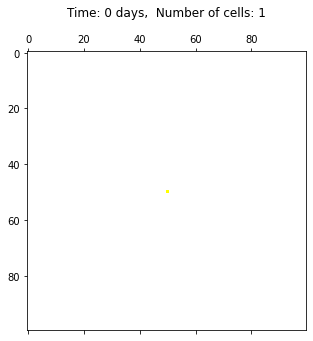


 -------------------------------------------- 



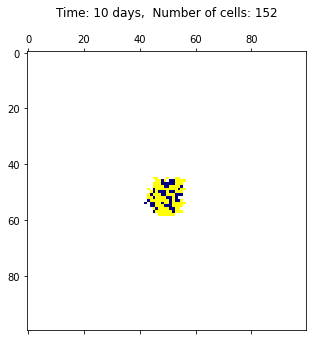


 -------------------------------------------- 



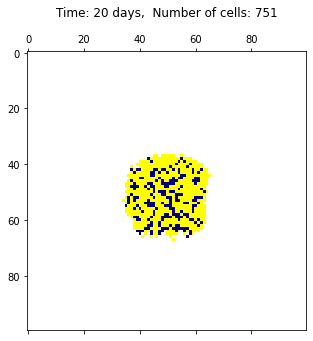


 -------------------------------------------- 



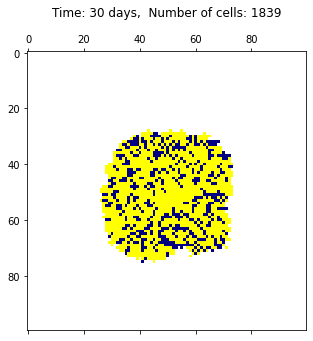


 -------------------------------------------- 

Trayectory 12


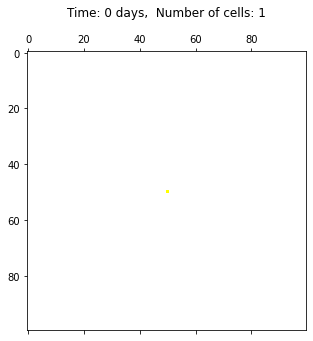


 -------------------------------------------- 



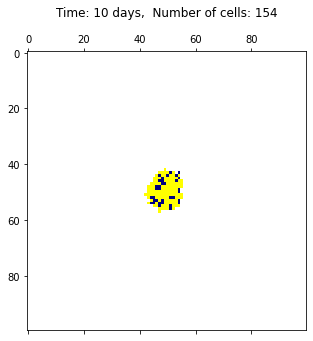


 -------------------------------------------- 



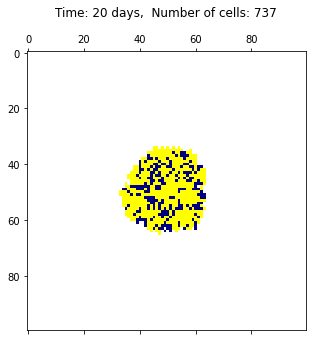


 -------------------------------------------- 



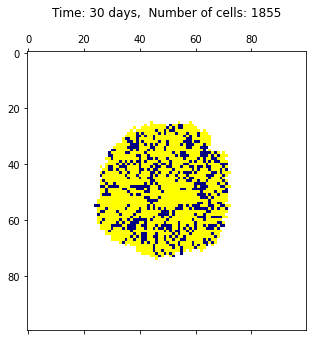


 -------------------------------------------- 

Trayectory 13


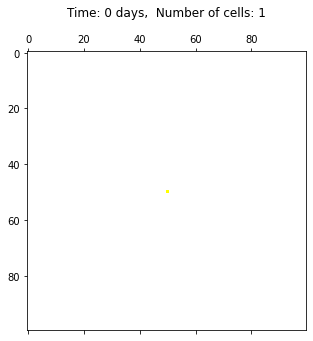


 -------------------------------------------- 



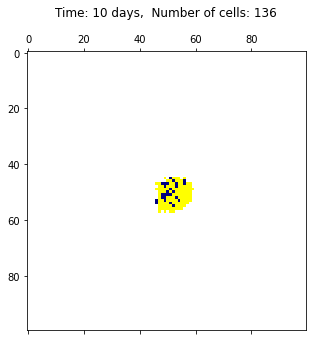


 -------------------------------------------- 



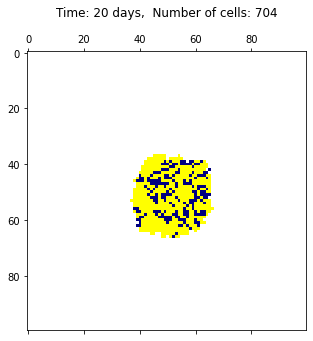


 -------------------------------------------- 



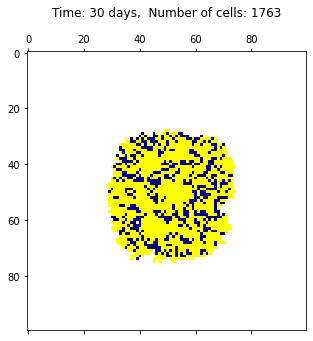


 -------------------------------------------- 

Trayectory 14


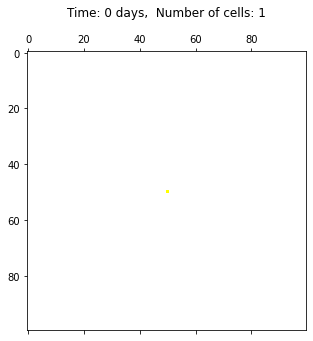


 -------------------------------------------- 



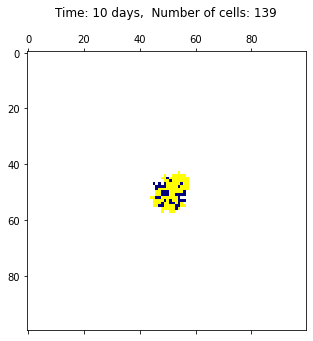


 -------------------------------------------- 



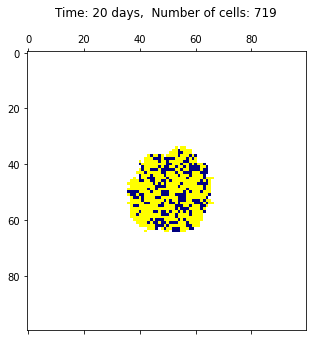


 -------------------------------------------- 



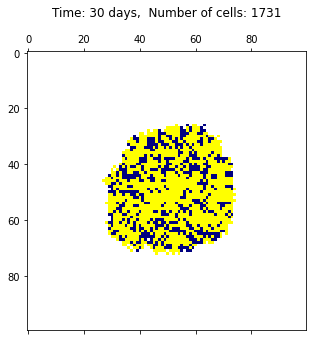


 -------------------------------------------- 

Trayectory 15


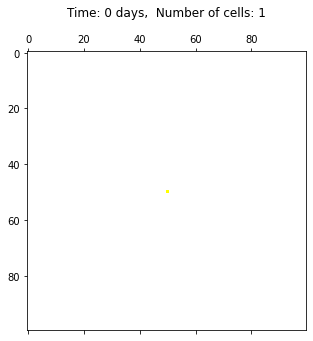


 -------------------------------------------- 



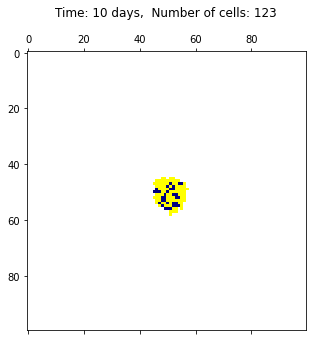


 -------------------------------------------- 



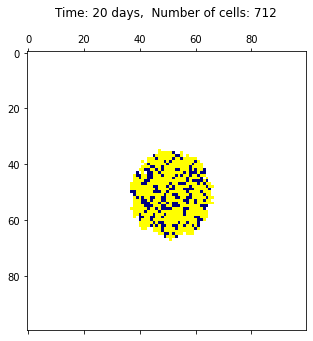


 -------------------------------------------- 



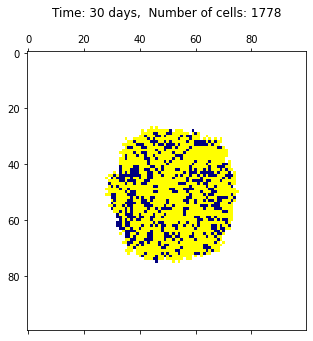


 -------------------------------------------- 

Trayectory 16


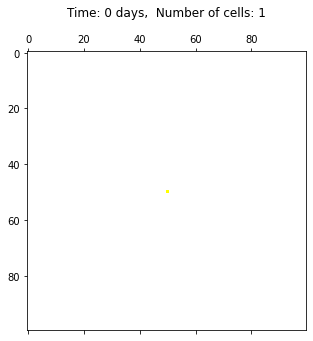


 -------------------------------------------- 



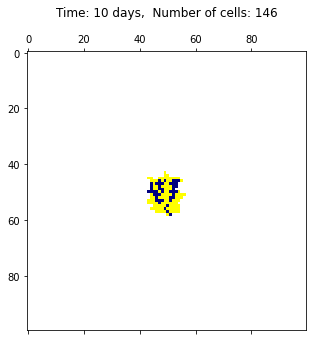


 -------------------------------------------- 



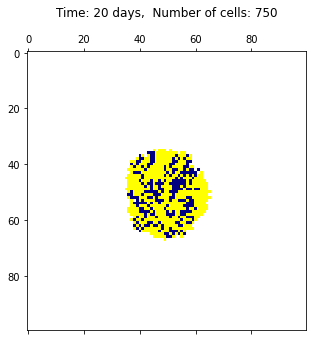


 -------------------------------------------- 



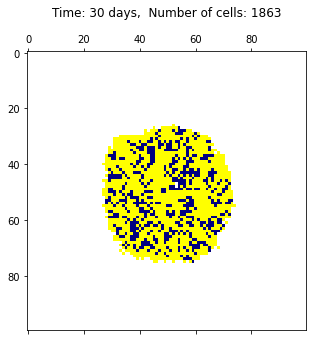


 -------------------------------------------- 

Trayectory 17


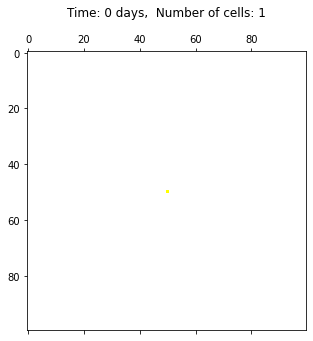


 -------------------------------------------- 



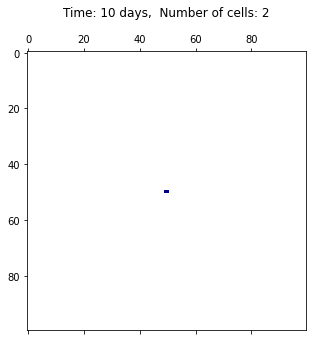


 -------------------------------------------- 



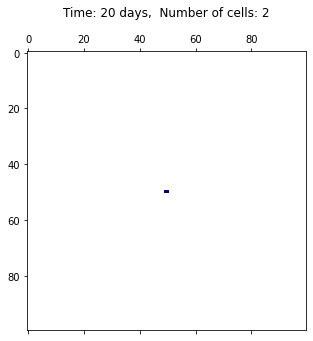


 -------------------------------------------- 



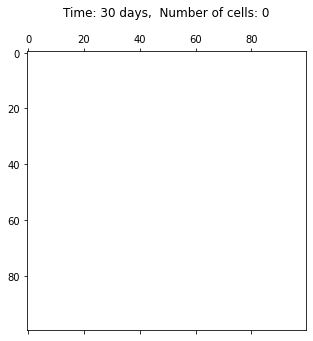


 -------------------------------------------- 

Trayectory 18


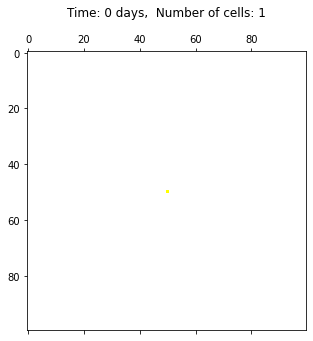


 -------------------------------------------- 



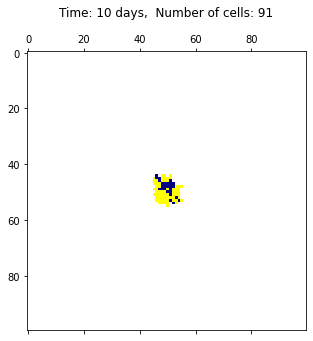


 -------------------------------------------- 



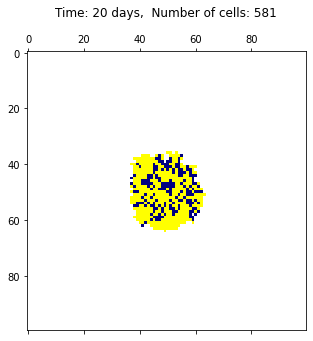


 -------------------------------------------- 



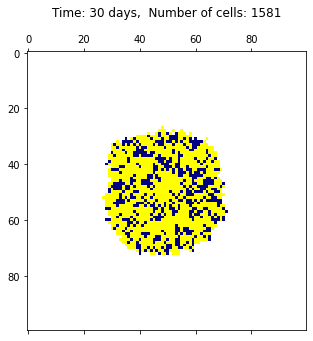


 -------------------------------------------- 

Trayectory 19


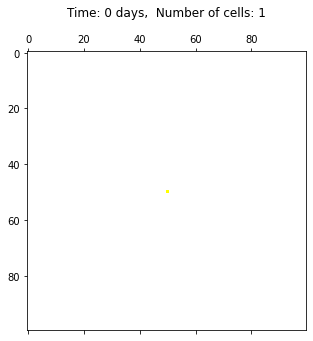


 -------------------------------------------- 



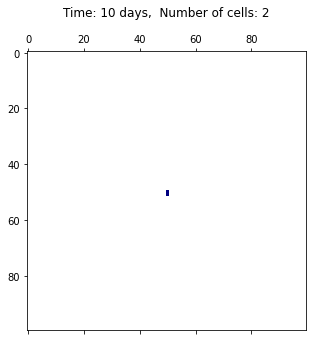


 -------------------------------------------- 



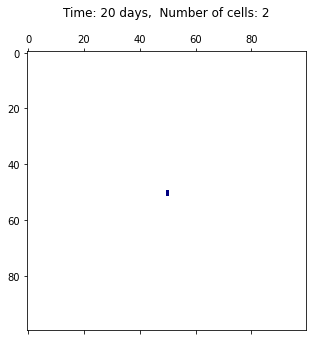


 -------------------------------------------- 



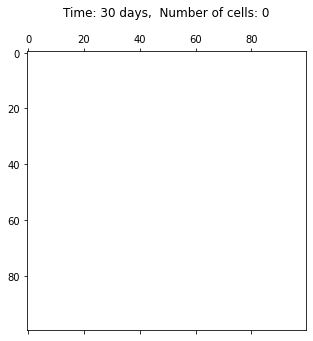


 -------------------------------------------- 

Trayectory 20


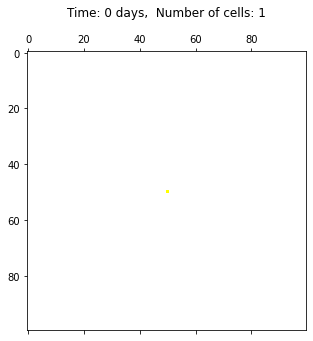


 -------------------------------------------- 



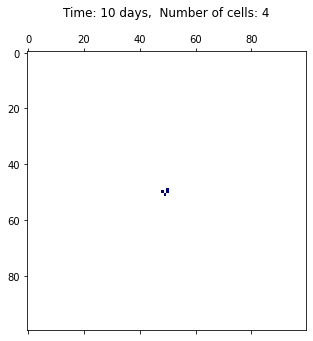


 -------------------------------------------- 



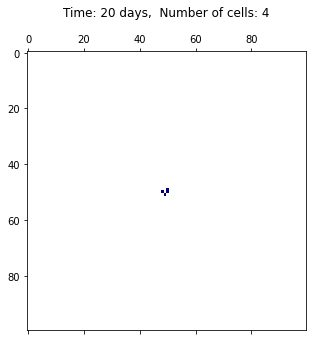


 -------------------------------------------- 



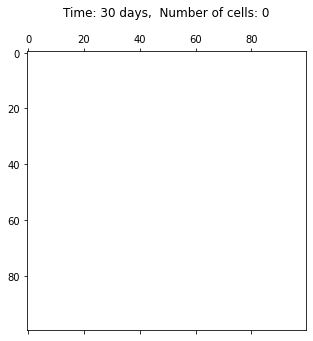


 -------------------------------------------- 



In [ ]:
for i in range(20):
  print('Trayectory', i+1)
  #Create array. Domain size is imax x jmax
  imax = 100
  jmax = 100

  max_age = 20 #days
  #Division probability
  pdiv = 0.85
  g = 0#0.009
  env = np.zeros((imax,jmax), dtype=int) #store phenotype
  alive_days = np.zeros((imax,jmax), dtype=int) #Initialize alive_days for differentiated cells
  treatment = 0 #0 off, 1 on.
  treatment_time = 15 #days

  #Locate initial stem cell
  env[50,50] = 1 #phenotype 1 = Stem cell

  #Store initial state
  initial_env = env
  #List to store number of cells during time
  Number_of_cells = []
  t = [*range(1,31)] #time in days from day 1

  #plot initial conditions
  n_initialcells = np.sum(env) 
  cmap = colors.ListedColormap(['white', 'yellow', 'navy']) #stem are yellow and differentiated are navy
  fig, ax = plt.subplots(figsize=(5, 6))
  ax.matshow(initial_env, vmin=0, vmax=2, cmap=cmap)
  ax.set_title("Time: 0 days," + "  Number of cells: %1.0f"%n_initialcells + "\n")
  plt.show()
  print("\n -------------------------------------------- \n")

  #Iterate over time
  for Time in t:
      mask = (env == 2).astype(int) #Take differentiated cells and set matrix of 1's
      alive_days = alive_days + mask #sum 1 to each differentiated cell
      #Extract differentiated cell's index
      if np.any(alive_days == max_age + 1):
          mask2 = 2*(alive_days == max_age + 1).astype(int) #multiplied by phenotype (2)
          env = env - mask2 #death of phenotype
          #Reset alive_days
          alive_days[mask2 == 2] = 0
      #print(alive_days)
      #Feedback loop definition
      Number_Diff_cells = np.sum(env == 2)
      pdiv = pdiv/(1+(g*Number_Diff_cells))
      #print(Number_Diff_cells)
      #Extract cells' index for the state at a certain time
      cells_index = np.argwhere(env != 0) 
      cells_index_temp = cells_index.tolist()

      #loop over the cells for division or not
      for cell in range(np.sum(env != 0)):
          #Sample cell
          picked_cell = random.sample(cells_index_temp,1)[0]
          #Extract cell's index
          i = picked_cell[0]
          j = picked_cell[1]

          if env[i,j] == 2: 
              cells_index_temp.remove(picked_cell)
              continue #differentiated cell do not divide
          else: #stem cell
    
              #Look for the neighbors that are zero and store their index
              neighbors = [[m+i,j+n] for m in range(-1,2) for n in range(-1,2) if env[m+i, j+n] == 0]
              #If there are no neighbors go to the next cell, do not divide
              if not neighbors: 
                  cells_index_temp.remove(picked_cell)
                  continue  
              else:
                  if Time >= treatment_time and treatment == 1: #If stem cell wants to divide, die.
                      env[i,j] = 0
                      continue
                  #Sample the neighbors and place a 1 in that cell. A cell has dvided
                  picked_neigh = random.sample(neighbors,1)[0]
                  phenotype = division_decision(pdiv) #of symmetric division
                  if phenotype == 1: 
                      env[picked_neigh[0],picked_neigh[1]] = 1
                      env[i,j] = 1
                  else:   #Differentiated cells
                      env[picked_neigh[0],picked_neigh[1]] = 2
                      env[i,j] = 2
                  #delete cell from cells_index_temp
                  cells_index_temp.remove(picked_cell)
      #end for of cells
      #alive_days[np.argwhere(env == 2)] = 0
      count_cells = np.sum(env != 0)
      Number_of_cells.append(count_cells)
      #Plot
      if Time%10 == 0:
         fig, ax = plt.subplots(figsize=(5, 6))
         ax.set_title("Time: %1.0f days" %Time + ",  Number of cells: %1.0f"%count_cells + "\n")
         ax.matshow(env, vmin=0, vmax=2, cmap=cmap)
         plt.show()
         print("\n -------------------------------------------- \n")

  #Including the initial conditions
  t.insert(0, 0)
  Number_of_cells.insert(0,n_initialcells)
  if g != 0:
      trayectories.append(Number_of_cells) 
  else:
      trayectories_no_control.append(Number_of_cells) 

Text(0, 0.5, 'Total number of cells')

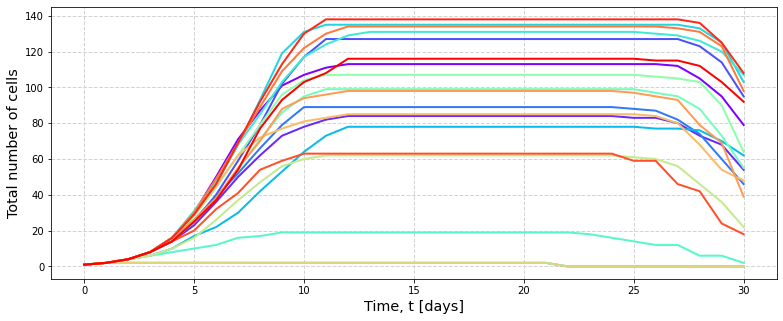

In [ ]:
n = 20
fig, ax = plt.subplots(figsize=(13, 5))
ax.grid(color='#D3D3D3', linestyle='--', linewidth=1)
color = iter(cm.rainbow(np.linspace(0, 1, n)))
for curve in trayectories:
    c = next(color)
    ax.plot(t, curve, color = c, linewidth = 2, label = 'ABM result')
    
ax.set_xlabel('Time, t [days]', size = 'x-large')
ax.set_ylabel('Total number of cells', size = 'x-large')

In [ ]:
array_trayectories = np.array(trayectories)
array_trayectores_nocontrol = np.array(trayectories_no_control)
column_average = average(array_trayectories, axis=0)
column_average_nocontrol = average(trayectories_no_control, axis=0)

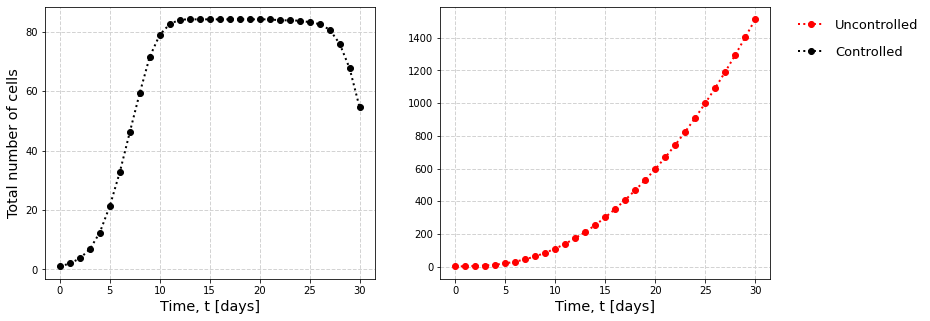

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13, 5))
ax1.grid(color='#D3D3D3', linestyle='--', linewidth=1)
ax2.grid(color='#D3D3D3', linestyle='--', linewidth=1)
ax1.plot(t, column_average, color = 'black', linestyle = ':',  marker='o', linewidth = 2, label = 'Controlled')
ax2.plot(t, column_average_nocontrol, color = 'red', linestyle = ':',  marker='o', linewidth = 2, label = 'Uncontrolled')
    
ax1.set_xlabel('Time, t [days]', size = 'x-large')
ax2.set_xlabel('Time, t [days]', size = 'x-large')
ax1.set_ylabel('Total number of cells', size = 'x-large')
#ax1.legend(bbox_to_anchor=(0.75, 0.2),loc='lower center', fontsize=13)
#ax2.legend(bbox_to_anchor=(0.13, 0.7),loc='upper left', fontsize=13)

leg1 = ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13)
leg2 = ax1.legend(bbox_to_anchor=(2.2499, 0.9), loc='upper left', fontsize=13)
leg1.get_frame().set_linewidth(0.0)
leg2.get_frame().set_linewidth(0.0)

#ax.legend(bbox_to_anchor=(0.1, 0.87), loc='upper left', fontsize=13)

#plt.title('Tumor Growth',  size ='x-large', pad = 15)
# images_dir = '/content/gdrive/My Drive/'
# plt.savefig(f"{images_dir}/ControlledTumorGrowth_ABM.pdf", bbox_to_anchor=(1.04,0.5), bbox_inches='tight', dpi = 300)

## **Question 5**

Trayectory 1


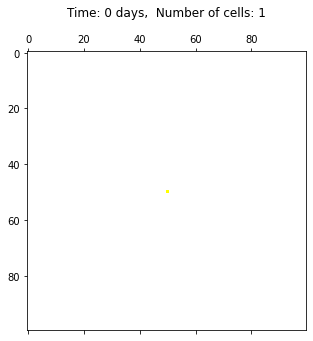


 -------------------------------------------- 



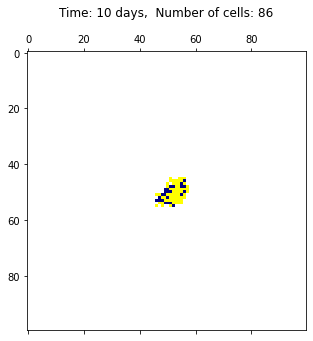


 -------------------------------------------- 



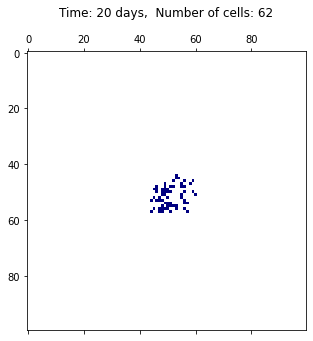


 -------------------------------------------- 



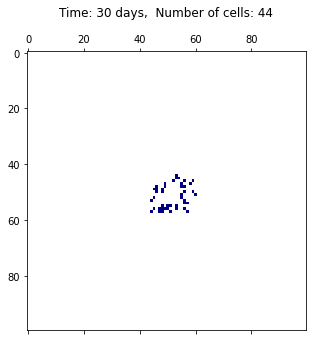


 -------------------------------------------- 

Trayectory 2


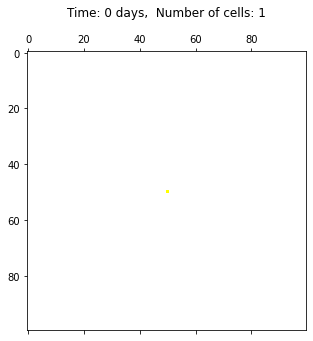


 -------------------------------------------- 



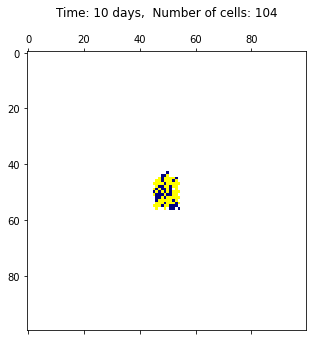


 -------------------------------------------- 



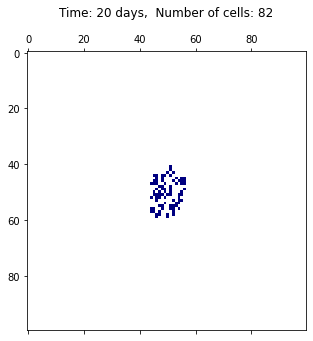


 -------------------------------------------- 



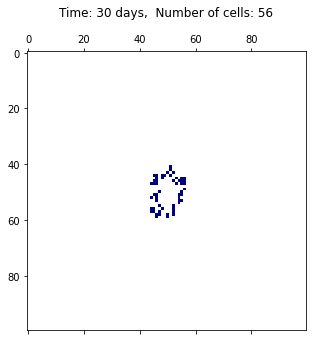


 -------------------------------------------- 

Trayectory 3


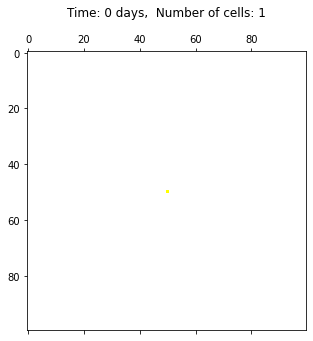


 -------------------------------------------- 



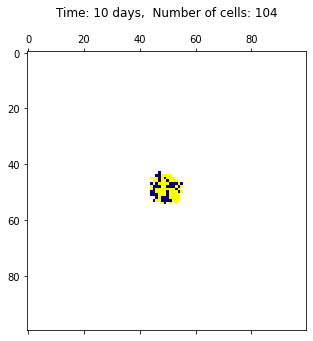


 -------------------------------------------- 



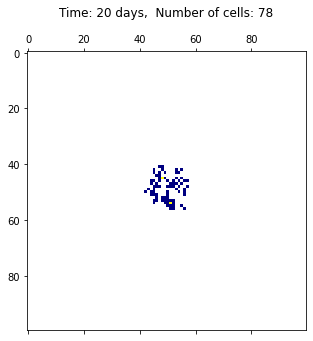


 -------------------------------------------- 



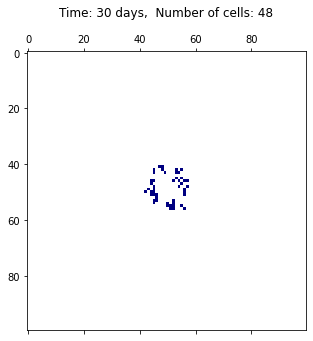


 -------------------------------------------- 

Trayectory 4


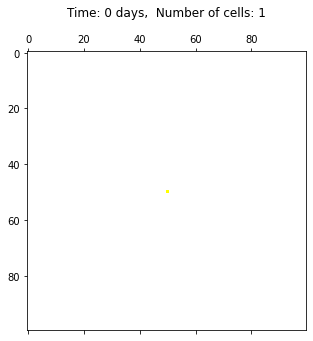


 -------------------------------------------- 



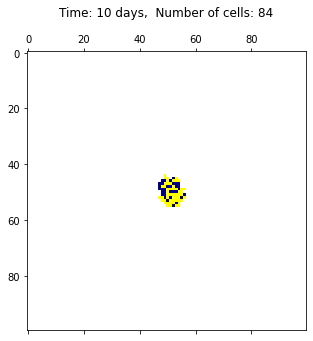


 -------------------------------------------- 



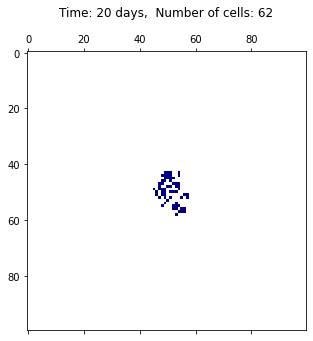


 -------------------------------------------- 



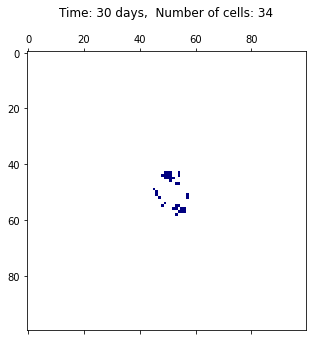


 -------------------------------------------- 

Trayectory 5


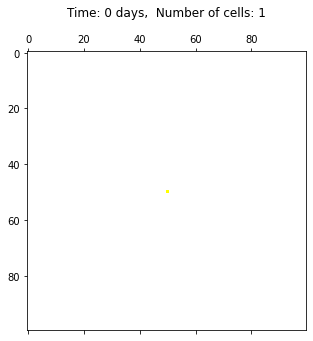


 -------------------------------------------- 



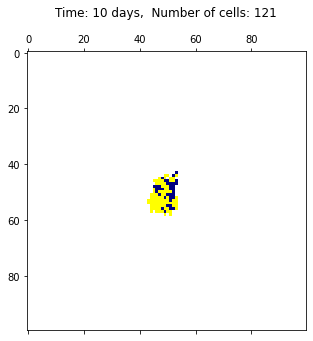


 -------------------------------------------- 



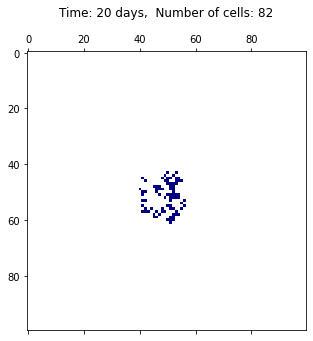


 -------------------------------------------- 



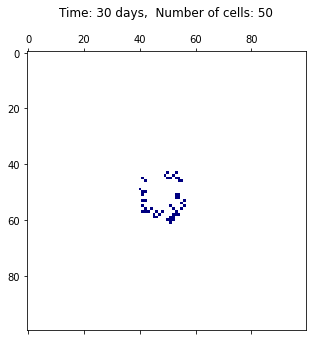


 -------------------------------------------- 

Trayectory 6


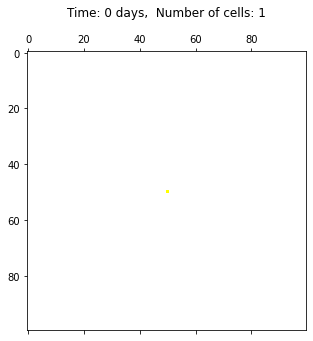


 -------------------------------------------- 



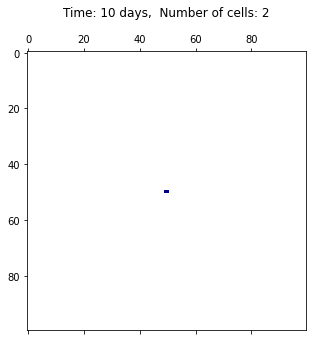


 -------------------------------------------- 



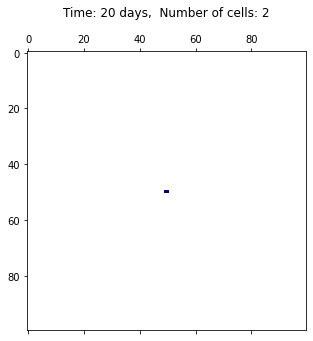


 -------------------------------------------- 



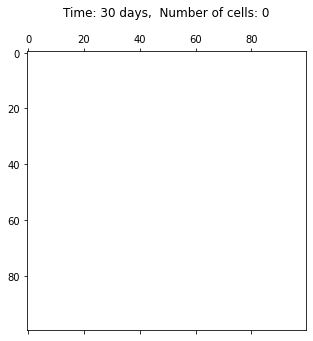


 -------------------------------------------- 

Trayectory 7


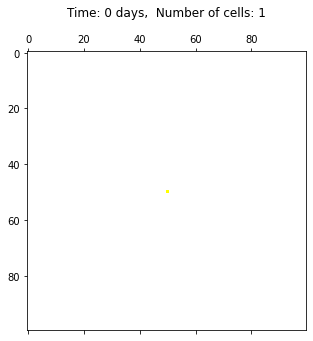


 -------------------------------------------- 



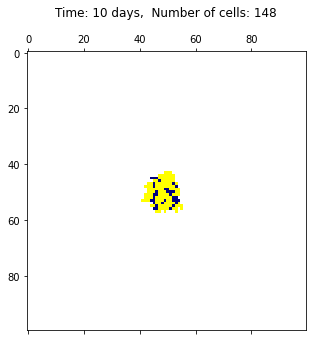


 -------------------------------------------- 



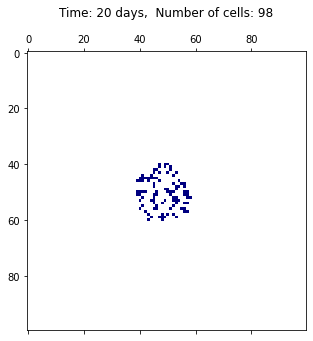


 -------------------------------------------- 



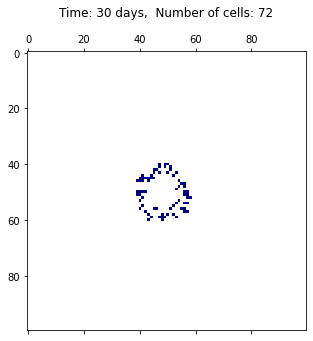


 -------------------------------------------- 

Trayectory 8


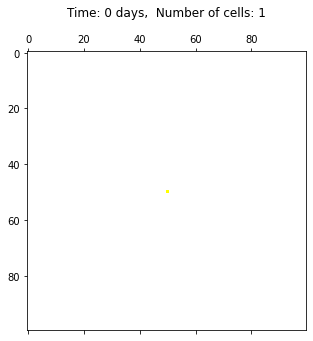


 -------------------------------------------- 



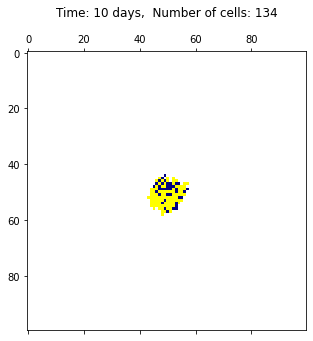


 -------------------------------------------- 



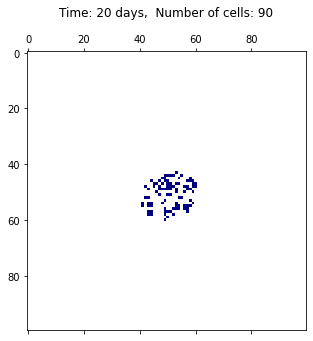


 -------------------------------------------- 



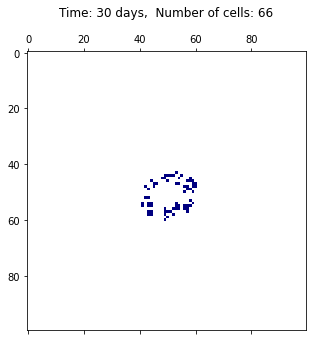


 -------------------------------------------- 

Trayectory 9


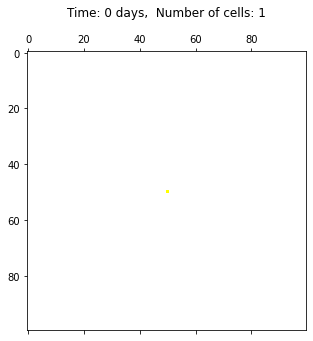


 -------------------------------------------- 



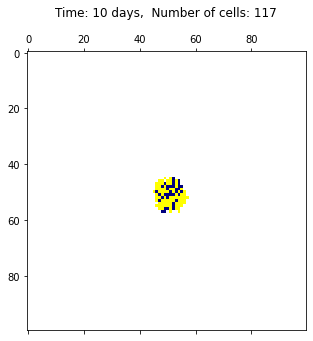


 -------------------------------------------- 



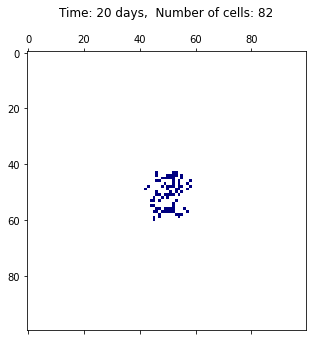


 -------------------------------------------- 



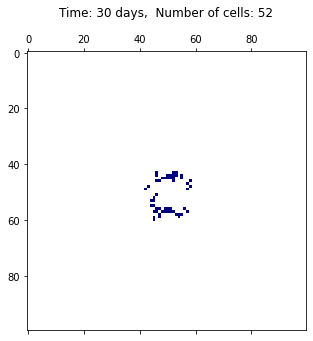


 -------------------------------------------- 

Trayectory 10


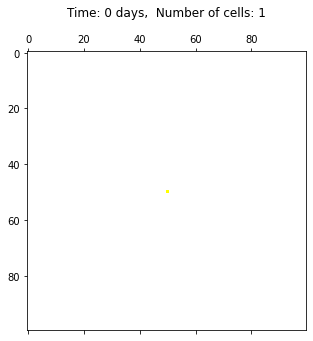


 -------------------------------------------- 



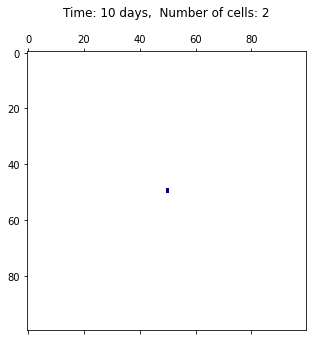


 -------------------------------------------- 



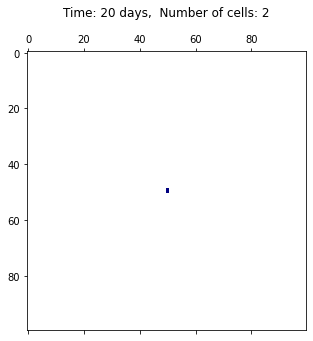


 -------------------------------------------- 



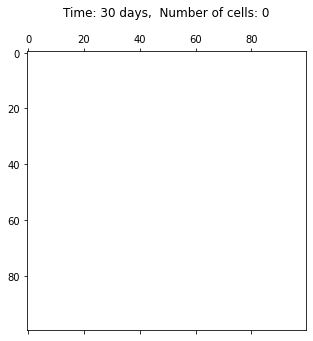


 -------------------------------------------- 

Trayectory 11


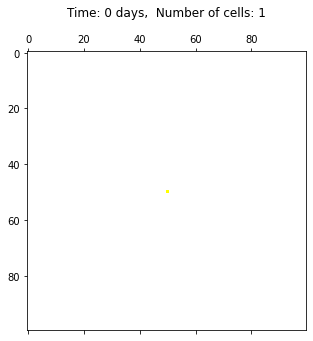


 -------------------------------------------- 



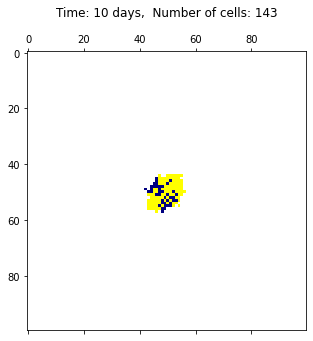


 -------------------------------------------- 



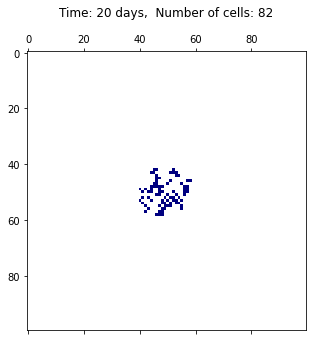


 -------------------------------------------- 



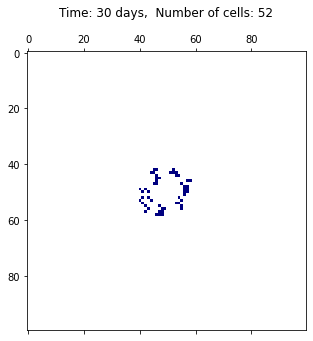


 -------------------------------------------- 

Trayectory 12


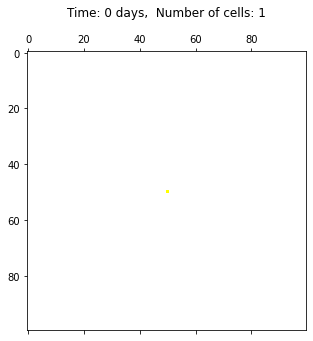


 -------------------------------------------- 



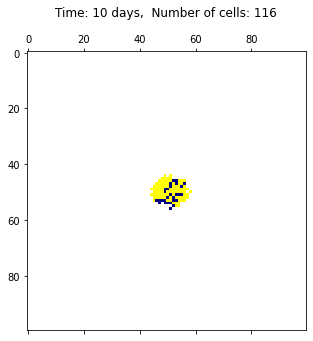


 -------------------------------------------- 



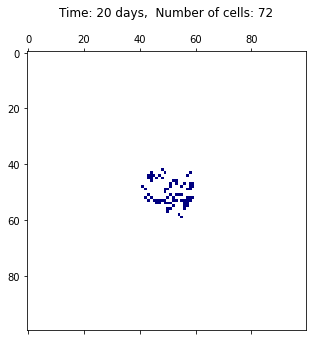


 -------------------------------------------- 



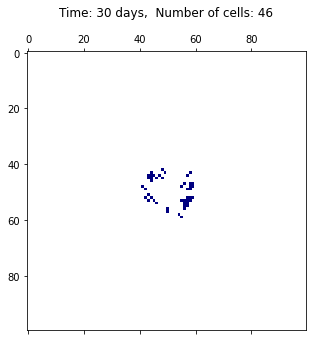


 -------------------------------------------- 

Trayectory 13


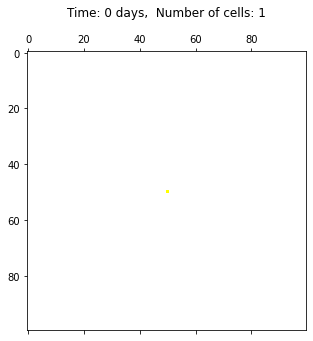


 -------------------------------------------- 



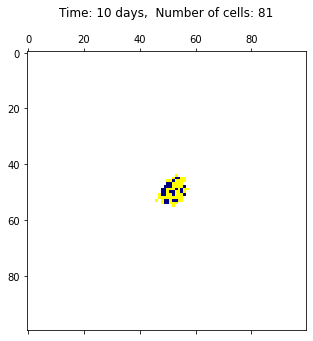


 -------------------------------------------- 



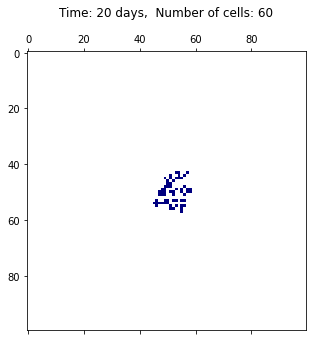


 -------------------------------------------- 



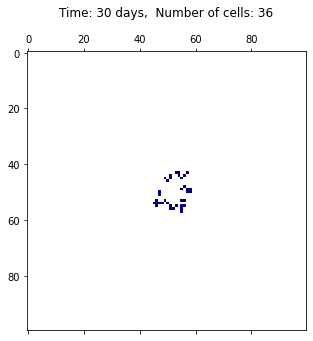


 -------------------------------------------- 

Trayectory 14


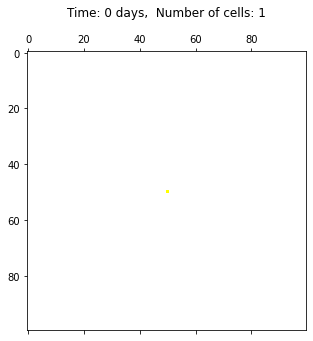


 -------------------------------------------- 



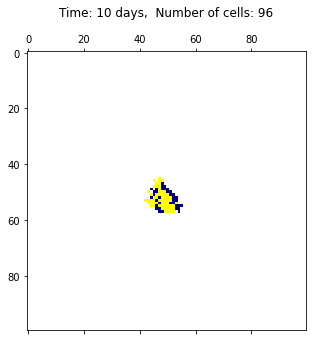


 -------------------------------------------- 



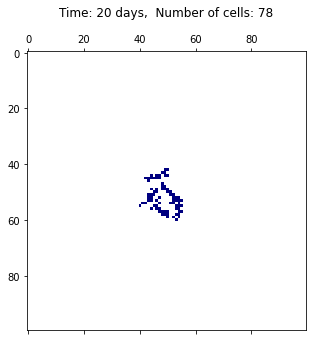


 -------------------------------------------- 



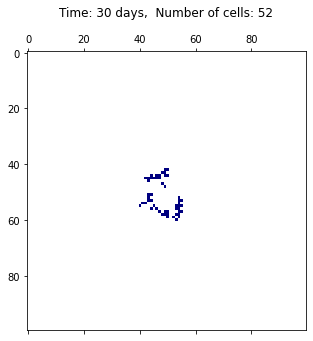


 -------------------------------------------- 

Trayectory 15


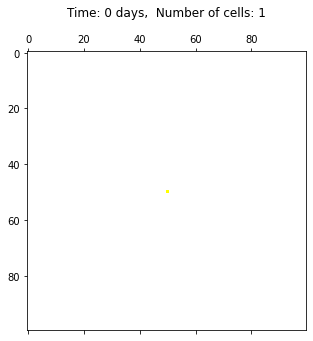


 -------------------------------------------- 



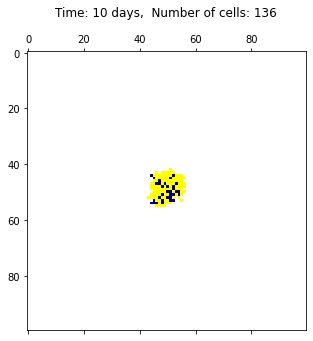


 -------------------------------------------- 



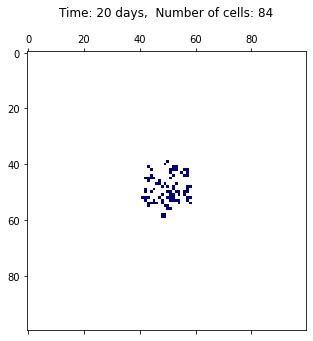


 -------------------------------------------- 



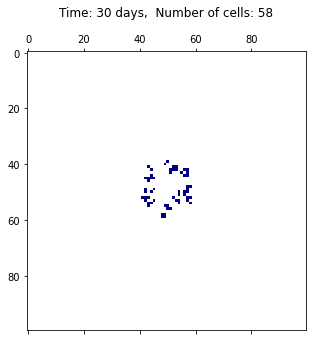


 -------------------------------------------- 

Trayectory 16


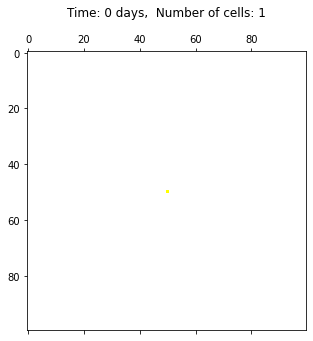


 -------------------------------------------- 



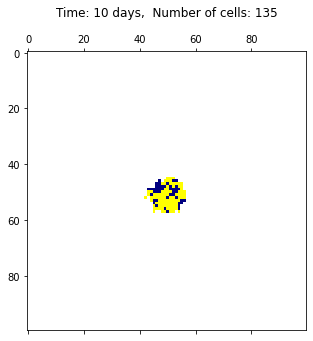


 -------------------------------------------- 



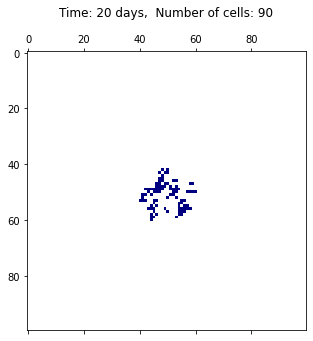


 -------------------------------------------- 



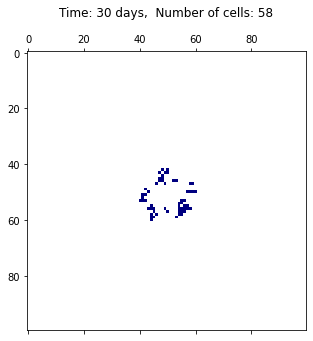


 -------------------------------------------- 

Trayectory 17


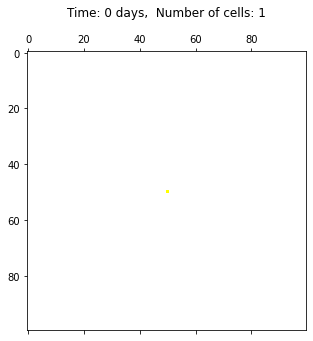


 -------------------------------------------- 



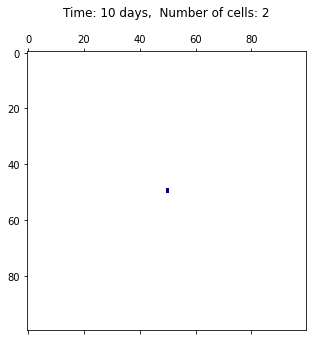


 -------------------------------------------- 



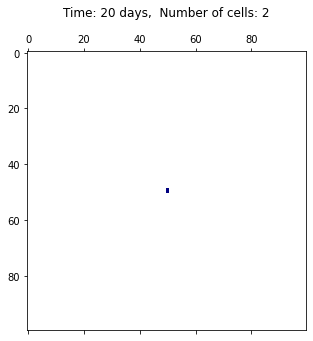


 -------------------------------------------- 



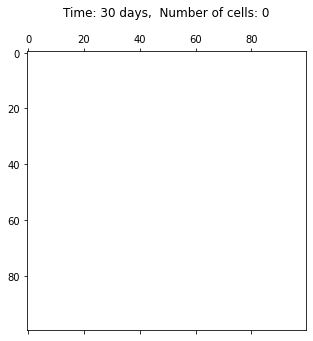


 -------------------------------------------- 

Trayectory 18


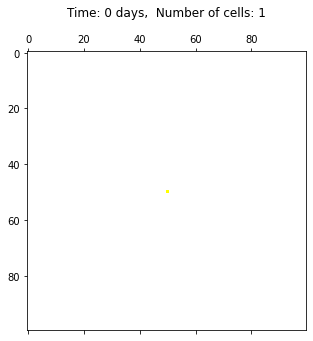


 -------------------------------------------- 



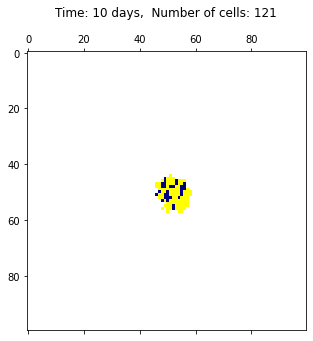


 -------------------------------------------- 



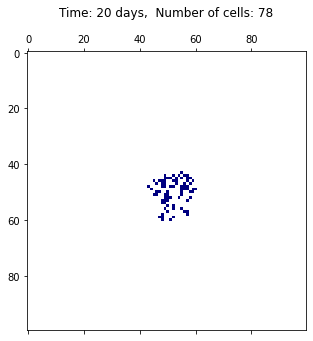


 -------------------------------------------- 



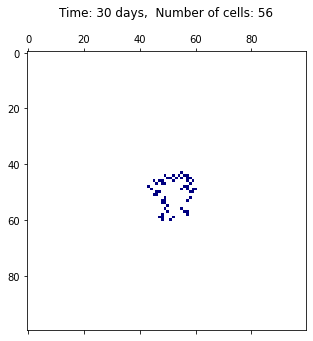


 -------------------------------------------- 

Trayectory 19


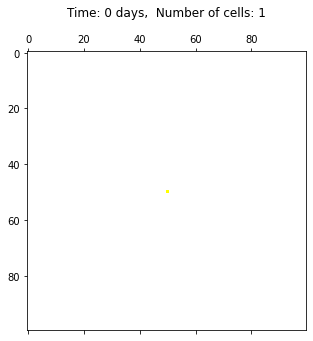


 -------------------------------------------- 



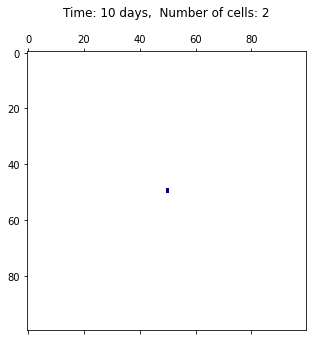


 -------------------------------------------- 



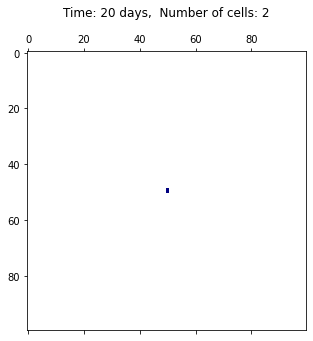


 -------------------------------------------- 



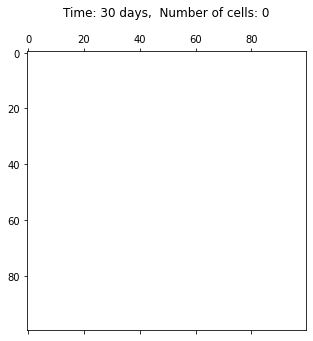


 -------------------------------------------- 

Trayectory 20


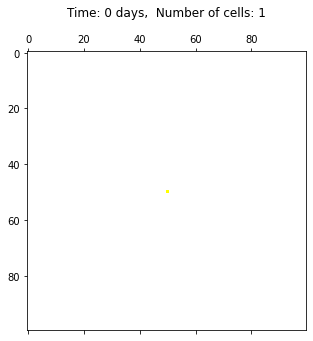


 -------------------------------------------- 



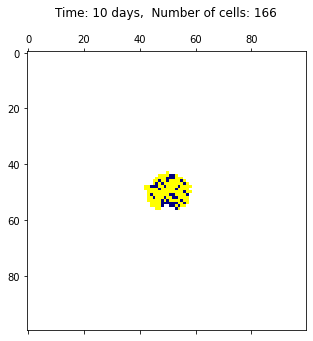


 -------------------------------------------- 



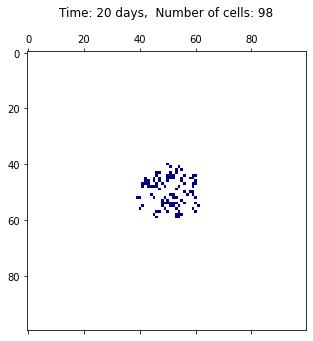


 -------------------------------------------- 



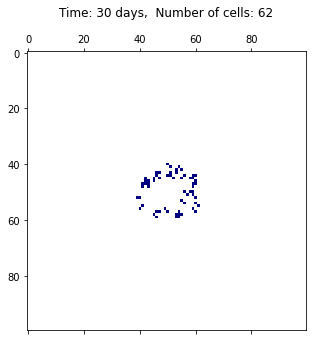


 -------------------------------------------- 



In [ ]:
trayectories_treatment = []
for i in range(20):
  print('Trayectory', i+1)
  #Create array. Domain size is imax x jmax
  imax = 100
  jmax = 100

  max_age = 20 #days
  #Division probability
  pdiv = 0.85
  g = 0#0.009
  env = np.zeros((imax,jmax), dtype=int) #store phenotype
  alive_days = np.zeros((imax,jmax), dtype=int) #Initialize alive_days for differentiated cells
  treatment = 1 #0 off, 1 on.
  treatment_time = 15 #days

  #Locate initial stem cell
  env[50,50] = 1 #phenotype 1 = Stem cell

  #Store initial state
  initial_env = env
  #List to store number of cells during time
  Number_of_cells = []
  t = [*range(1,31)] #time in days from day 1

  #plot initial conditions
  n_initialcells = np.sum(env) 
  cmap = colors.ListedColormap(['white', 'yellow', 'navy']) #stem are yellow and differentiated are navy
  fig, ax = plt.subplots(figsize=(5, 6))
  ax.matshow(initial_env, vmin=0, vmax=2, cmap=cmap)
  ax.set_title("Time: 0 days," + "  Number of cells: %1.0f"%n_initialcells + "\n")
  plt.show()
  print("\n -------------------------------------------- \n")

  #Iterate over time
  for Time in t:
      mask = (env == 2).astype(int) #Take differentiated cells and set matrix of 1's
      alive_days = alive_days + mask #sum 1 to each differentiated cell
      #Extract differentiated cell's index
      if np.any(alive_days == max_age + 1):
          mask2 = 2*(alive_days == max_age + 1).astype(int) #multiplied by phenotype (2)
          env = env - mask2 #death of phenotype
          #Reset alive_days
          alive_days[mask2 == 2] = 0
      #print(alive_days)
      #Feedback loop definition
      Number_Diff_cells = np.sum(env == 2)
      pdiv = pdiv/(1+(g*Number_Diff_cells))
      #print(Number_Diff_cells)
      #Extract cells' index for the state at a certain time
      cells_index = np.argwhere(env != 0) 
      cells_index_temp = cells_index.tolist()

      #loop over the cells for division or not
      for cell in range(np.sum(env != 0)):
          #Sample cell
          picked_cell = random.sample(cells_index_temp,1)[0]
          #Extract cell's index
          i = picked_cell[0]
          j = picked_cell[1]

          if env[i,j] == 2: 
              cells_index_temp.remove(picked_cell)
              continue #differentiated cell do not divide
          else: #stem cell
    
              #Look for the neighbors that are zero and store their index
              neighbors = [[m+i,j+n] for m in range(-1,2) for n in range(-1,2) if env[m+i, j+n] == 0]
              #If there are no neighbors go to the next cell, do not divide
              if not neighbors: 
                  cells_index_temp.remove(picked_cell)
                  continue  
              else:
                  if Time >= treatment_time and treatment == 1: #If stem cell wants to divide, die.
                      env[i,j] = 0
                      continue
                  #Sample the neighbors and place a 1 in that cell. A cell has dvided
                  picked_neigh = random.sample(neighbors,1)[0]
                  phenotype = division_decision(pdiv) #of symmetric division
                  if phenotype == 1: 
                      env[picked_neigh[0],picked_neigh[1]] = 1
                      env[i,j] = 1
                  else:   #Differentiated cells
                      env[picked_neigh[0],picked_neigh[1]] = 2
                      env[i,j] = 2
                  #delete cell from cells_index_temp
                  cells_index_temp.remove(picked_cell)
      #end for of cells
      #alive_days[np.argwhere(env == 2)] = 0
      count_cells = np.sum(env != 0)
      Number_of_cells.append(count_cells)
      #Plot
      if Time%10 == 0:
         fig, ax = plt.subplots(figsize=(5, 6))
         ax.set_title("Time: %1.0f days" %Time + ",  Number of cells: %1.0f"%count_cells + "\n")
         ax.matshow(env, vmin=0, vmax=2, cmap=cmap)
         plt.show()
         print("\n -------------------------------------------- \n")

  #Including the initial conditions
  t.insert(0, 0)
  Number_of_cells.insert(0,n_initialcells)
  trayectories_treatment.append(Number_of_cells) 


In [ ]:
array_trayectories_treatment = np.array(trayectories_treatment)
column_average_treatment = average(trayectories_treatment, axis=0)

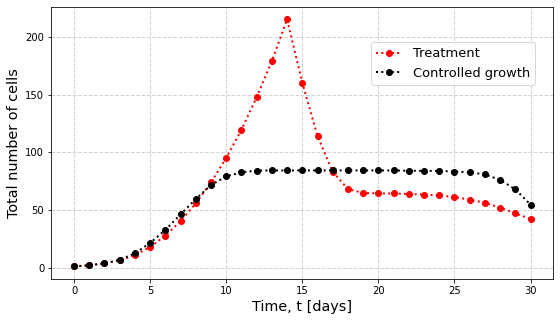

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.grid(color='#D3D3D3', linestyle='--', linewidth=1)
ax.plot(t, column_average_treatment, color = 'red', linestyle = ':',  marker='o', linewidth = 2, label = 'Treatment')
ax.plot(t, column_average, color = 'black', linestyle = ':',  marker='o', linewidth = 2, label = 'Controlled growth')
    
ax.set_xlabel('Time, t [days]', size = 'x-large')
ax.set_ylabel('Total number of cells', size = 'x-large')
ax.legend(bbox_to_anchor=(0.8, 0.69),loc='lower center', fontsize=13)

# images_dir = '/content/gdrive/My Drive/'
# plt.savefig(f"{images_dir}/ControlledTumorGrowth_ABM.pdf", bbox_to_anchor=(1.04,0.5), bbox_inches='tight', dpi = 300)